In [1]:
from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1, TGraphErrors
from ROOT import gStyle
from array import array
import math
import numpy as np
import random

c1 = TCanvas( 'c1', 'Fitting Example with Errors', 200, 10, 700, 500 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(3,2)

Welcome to JupyROOT 6.16/00


In [2]:
def generator_function(x,par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

par = array('d')
par.append(0.4321)
par.append(1.6789)
par.append(0.50)
par.append(1.0000)

In [3]:
gStyle.SetOptFit(1)
n = 15 #Set the number of data points

In [4]:
x = array('d')
y = array('d')
ex = array('d')
ey = array('d')

In [5]:
for i in range(0,n):
    x.append(i+1)
    y.append(generator_function(x[i],par) + 10.0*random.gauss(0.0,1.0))
    ex.append(0.0)
    ey.append(5.0*math.sqrt(math.fabs(y[i])))

chi2/dof = 199.373290 / 13.000000
Coefficients with Errors:
p0 = -185.150091 +/- 16.477157
p1 = 108.801635 +/- 5.633006
pol1
Fit 1: 199.373290 13.000000 

chi2/dof = 6.540795 / 12.000000
Coefficients with Errors:
p0 = 88.379192 +/- 25.680593
p1 = -82.314404 +/- 14.870966
p2 = 19.074031 +/- 1.373575
pol2
Fit 1: 6.540795 12.000000 

chi2/dof = 0.177321 / 11.000000
Coefficients with Errors:
p0 = 15.839441 +/- 38.553885
p1 = -9.416345 +/- 32.499907
p2 = 2.441701 +/- 6.734904
p3 = 0.911354 +/- 0.361277
pol3
Fit 1: 0.177321 11.000000 

chi2/dof = 0.106108 / 10.000000
Coefficients with Errors:
p0 = 27.662816 +/- 58.731703
p1 = -25.122340 +/- 67.232331
p2 = 8.174641 +/- 22.514067
p3 = 0.205402 +/- 2.669980
p4 = 0.026729 +/- 0.100160
pol4
Fit 1: 0.106108 10.000000 

chi2/dof = 0.085447 / 9.000000
Coefficients with Errors:
p0 = 38.586766 +/- 96.048457
p1 = -42.847040 +/- 140.450253
p2 = 16.995010 +/- 65.364169
p3 = -1.535411 +/- 12.401874
p4 = 0.170294 +/- 1.003809
p5 = -0.004134 +/- 0.028762
po

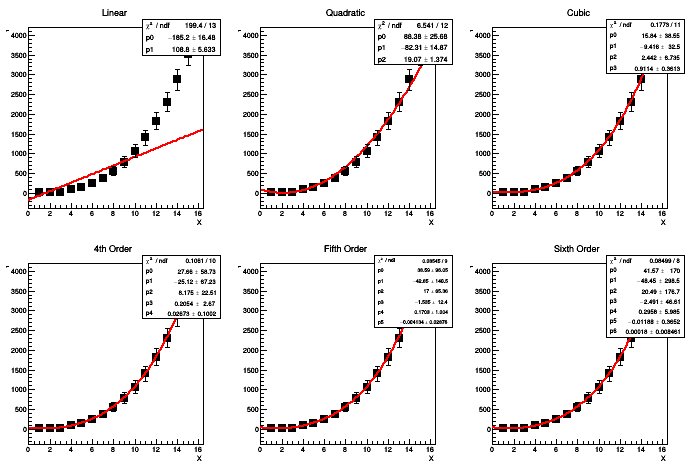

In [6]:
title = ["Linear","Quadratic","Cubic","4th Order","Fifth Order","Sixth Order"]
gr = []
max_order = 6
chi2list = array('d')
mlist = array('d')

for m in range(1,max_order+1):
    m_params = m + 1
    a = np.zeros(shape = (m_params,m_params))
    v = np.zeros(shape = (m_params,1))
    for k in range(0,m_params):
        for i in range(0,n):
            v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
            #print ("v[%d] = %f" % (k,v[k][0]))
        for j in range(0,m_params):
            for i in range(0,n):
                a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
                #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
    #print ("Cofactor matrix:")
    #print (a)
    #print ("Constant matrix:")
    #print (v)

    ainv = np.linalg.inv(a)
    u1 = np.dot(a,ainv)

    #print ("Inverse matrix")
    #print (ainv)
    #print ("Diagonal Check:")
    #print (u1)
    coeff = ainv*np.matrix(v)
    #print ("Coefficients:")
    #print (coeff)
    yfit = 0
    error_sum = 0
    for j in range(0,n):
        for k in range(0,m+1):
            yfit = yfit + coeff[k]*math.pow(x[j],k)
        #print ("i = %d  y = %f  yfit = %f" % (j,y[j],yfit))
        error_sum = error_sum + math.pow(((yfit-y[j])/ey[j]),2)
        yfit = 0
    
    chi2 = error_sum/(n-m)
    chi2list.append(chi2)
    mlist.append(m)
    print ("chi2/dof = %f / %f" % (error_sum,(n-m-1)))
    print ("Coefficients with Errors:")
    for k in range(0,m+1):
        print("p%d = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))
    poltype = "pol"+str(m)
    print (poltype)
    gr.append(TGraphErrors(n,x,y,ex,ey))
    pfit1 = TF1("pfit1",poltype)
    gr[m-1].SetMarkerStyle(21)
    gr[m-1].SetTitle(title[m-1])
    gr[m-1].GetXaxis().SetTitle("X")
    gr[m-1].GetYaxis().SetTitle("Y")
    gr[m-1].Fit("pfit1","q")
    pfit1chi2 = pfit1.GetChisquare()
    pfit1ndf = pfit1.GetNDF()
    pfit1chi2ndf = pfit1chi2/pfit1ndf
    print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))
    c1.cd(m)
    gr[m-1].Draw("AP")

c1.Draw()

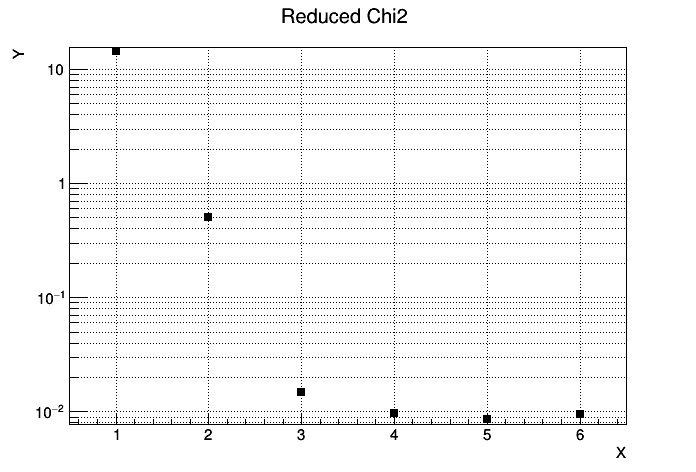

In [7]:
c2 = TCanvas( 'c2', 'Reduced Chi2', 200, 10, 700, 500 )
c2.SetGridx()
c2.SetGridy()
c2.GetFrame().SetFillColor( 21 )
c2.GetFrame().SetBorderMode(-1 )
c2.GetFrame().SetBorderSize( 5 )
c2.cd()
c2.SetLogy()

gr2 = TGraphErrors(max_order,mlist,chi2list)
gr2.SetMarkerStyle(21)
gr2.SetTitle("Reduced Chi2")
gr2.GetXaxis().SetTitle("X")
gr2.GetYaxis().SetTitle("Y")
gr2.Draw("AP")
c2.Draw()

In [8]:
import scipy.stats as stats
for m in range(1,max_order):
    fvalue = chi2list[m-1]/chi2list[m]
    fdistribution = stats.f(m,m+1)
    f_critical1 = fdistribution.ppf(0.05)
    f_critical2 = fdistribution.ppf(0.95)
    print("F = %f ... m1 = %d, m2 = %d ... F_low = %f, F_high = %f" % (fvalue,m,m+1,f_critical1,f_critical2))

F = 28.304255 ... m1 = 1, m2 = 2 ... F_low = 0.005013, F_high = 18.512821
F = 34.049372 ... m1 = 2, m2 = 3 ... F_low = 0.052180, F_high = 9.552094
F = 1.531880 ... m1 = 3, m2 = 4 ... F_low = 0.109683, F_high = 6.591382
F = 1.128903 ... m1 = 4, m2 = 5 ... F_low = 0.159845, F_high = 5.192168
F = 0.904792 ... m1 = 5, m2 = 6 ... F_low = 0.202008, F_high = 4.387374
